# Parameter sweep of mutation effect size

This notebook explore how the effect size of new mutations steer the evolutionary process. Mutations are modeled as a Brownian motion of the model parameters: two microscopic association constants k1 and k2, and a cooperativity factor f. Effect size is scaled by changing the Brownian motion model parameter dt

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

#### For each generation, the following stats are logged: mean and variance of population fitness; variance of model parameters; and number of unique parameters in population. Evolution was run on a population size of 1000 for 1000 generations

#### dt = .01

In [2]:
dt1 = pd.read_csv("dtSweep_0.1_0.csv",index_col=0)
dt1.head()

,w_bar,w_var,k1_var,k2_var,f_var,numk1,numk2,numf
gen,,,,,,,,
0,0.999168,3.917852e-07,0.040612,0.043138,0.039685,646,646,646
1,0.998801,8.015793e-07,0.085150,0.086154,0.081764,641,641,641
2,0.998596,1.173107e-06,0.121617,0.126191,0.114071,629,629,629
3,0.998373,1.606347e-06,0.161914,0.163820,0.154751,643,643,643
4,0.998232,1.838798e-06,0.219454,0.214999,0.180080,616,616,616


#### The parameters steadily increase in variance at the beginning

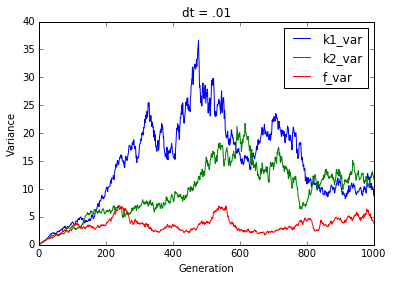

In [4]:
dt1[["k1_var","k2_var","f_var"]].plot()
plt.ylabel("Variance")
plt.xlabel("Generation")
plt.title("dt = .01")

#### The population mean fitness stays very close to 1, and the fitness variance near 0

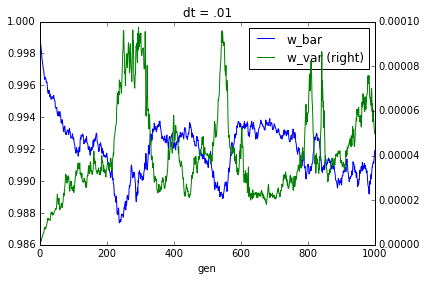

In [31]:
ax = dt1[["w_bar"]].plot()
dt1[["w_var"]].plot(ax=ax,secondary_y=True)

plt.title("dt = .01")
plt.xlabel("Generations")

#### The number of unique parameter values stay close to 635 (out of 1000) the whole time. That's surprising

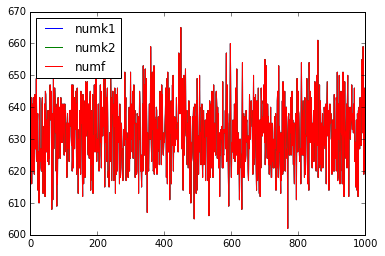

In [5]:
dt1[["numk1","numk2","numf"]].plot()

#### dt = 1000

In [33]:
dt2 = pd.read_csv("dtSweep_1000_0.csv")
dt2.head()

,gen,w_bar,w_var,k1_var,k2_var,f_var,numk1,numk2,numf
0,0,0.711474,0.005468,4.231979e+06,3.761147e+06,1.231239e+06,614,614,335
1,1,0.717239,0.005053,8.340721e+06,7.815218e+06,2.591445e+06,631,631,408
2,2,0.716481,0.004450,1.237445e+07,1.044886e+07,3.781548e+06,621,621,428
3,3,0.714988,0.003596,1.626782e+07,1.486958e+07,4.356632e+06,642,642,460
4,4,0.718540,0.003654,1.987717e+07,2.044011e+07,6.090693e+06,618,618,474


#### Qualitatively similar dynamics to when dt = .01

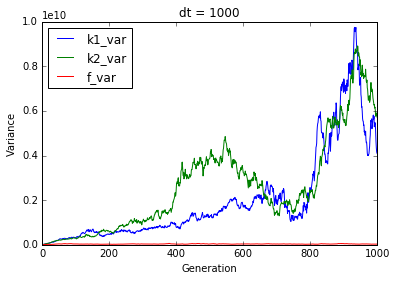

In [34]:
dt2[["k1_var","k2_var","f_var"]].plot()
plt.ylabel("Variance")
plt.xlabel("Generation")
plt.title("dt = 1000")

#### Fitness mean and variance also stay steady, though the mean fitness is quite a bit lower than when dt = .01 and variance a bit higher

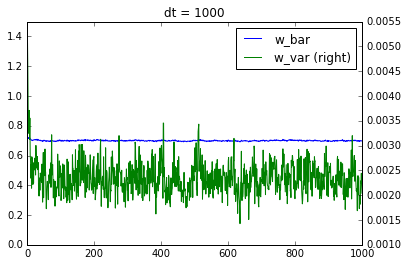

In [37]:
ax = dt2[["w_bar"]].plot(ylim=(0,1.5))
dt2[["w_var"]].plot(ax=ax,secondary_y=True)

plt.title("dt = 1000")
plt.xlabel("Generations")

#### Numer of unique params is similar for k1 and k2, but lower for f. Don't know what to make of that

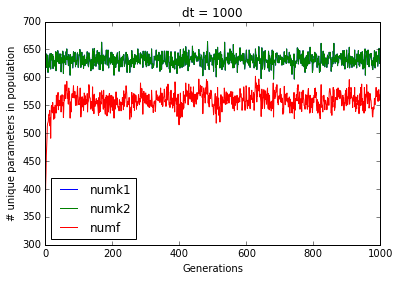

In [40]:
dt2[["numk1","numk2","numf"]].plot()
plt.title("dt = 1000")
plt.ylabel("# unique parameters in population")
plt.xlabel("Generations")

### Now we'll plot all the variances for the different dts on one plot

In [67]:
def plot_vars(infile_list,paramName,log=True):
    
    ax = plt.plot()

    styleD = {"0.1":"b--","1":"r--","10":"g--","100":"k--","1000":"m--"}

    for f in infile_list:
        df = pd.read_csv(f)
        df[paramName].plot(style=styleD[f.split("_")[1]],label=paramName.split("_")[0])

    if log:
        plt.yscale("log")
    plt.ylabel("%s variance" % paramName.split("_")[0])
    plt.xlabel("Generation")

#### They are on very different scales (we'll do a log y below)

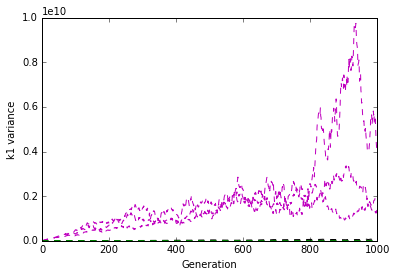

In [68]:
tmp = !ls *.csv
files = list(tmp)
plot_vars(files,"k1_var",log=False)

#### This is cool. Suggests that behavior is similar across different dts

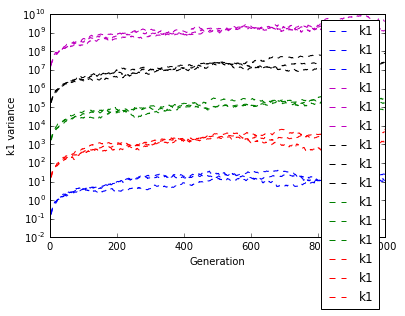

In [69]:
files = !ls *.csv

plot_vars(files,"k1_var",log=True)
plt.legend()

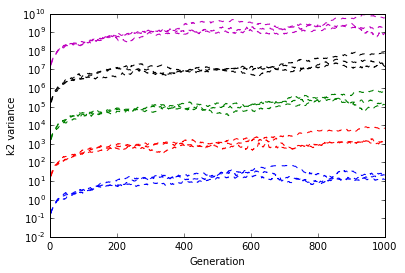

In [70]:
plot_vars(files,"k2_var",log=True)

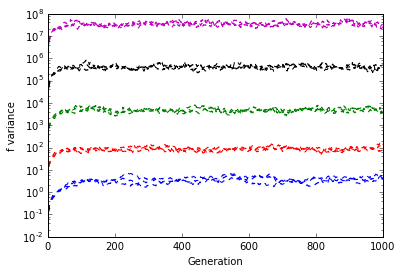

In [71]:
plot_vars(files,"f_var",log=True)